<a href="https://colab.research.google.com/github/yleessam/2501_dl_env_colab/blob/main/7_%ED%95%A9%EC%84%B1%EA%B3%B1%EC%97%B0%EC%82%B0%EA%B3%BC%ED%92%80%EB%A7%81.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

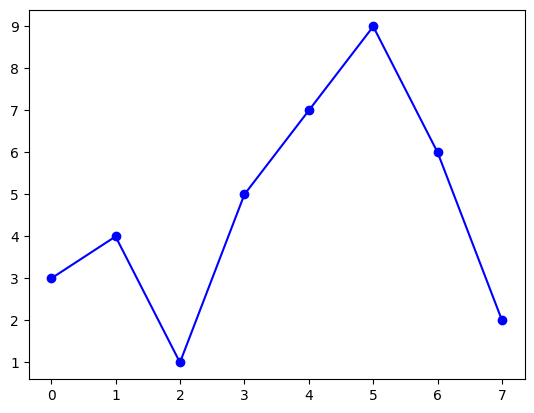

In [1]:
y = [3, 4, 1, 5, 7, 9, 6, 2]

import matplotlib.pyplot as plt
plt.plot(y, 'bo-')

이동평균을 계산해서 커널 적용

3개값을 기준으로 계산

 ma_y = [(y[i-1] + y[i] + y[i+1])/3]

 y[1] = (3+ 4 + 1 )3

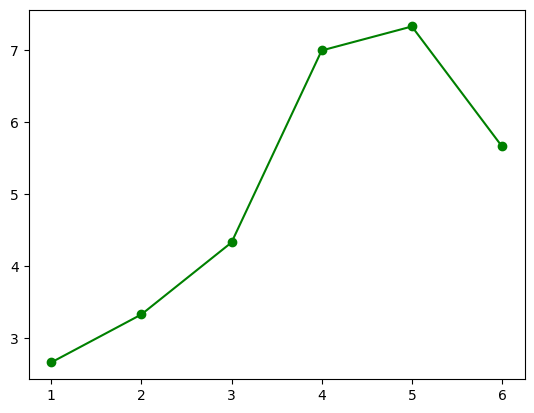

In [2]:
ma_y = [None, 8/3, 10/3, 13/3, 21/3, 22/3, 17/3, None]
plt.plot(ma_y, 'go-')

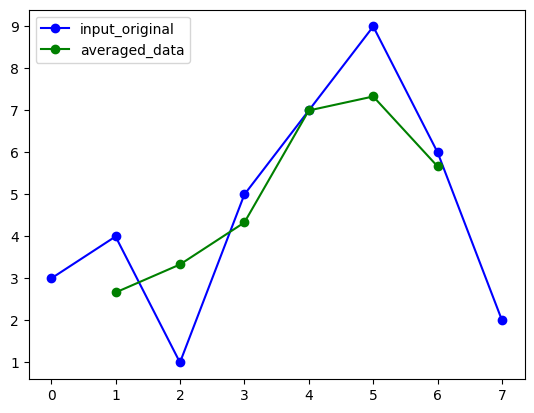

In [5]:
data = [3, 4, 1, 5, 7, 9, 6, 2]
ma_y = [None, 8/3, 10/3, 13/3, 21/3, 22/3, 17/3, None]
plt.plot(y, 'bo-', label='input_original')
plt.plot(ma_y, 'go-', label='averaged_data')
plt.legend()

#가중 이동 평균(Weighted Moving Average) : 가중치를 부여하여 평균을 구하는 방법


In [8]:
h = [1/4, 1/2, 1/4] #가중치
w_mavg = [None]
for i in range(1, len(data)-1) :
    w_mavg.append(h[0]*data[i-1] + h[1]*data[i] + h[2]*data[i+1])

w_mavg

[None, 3.0, 2.75, 4.5, 7.0, 7.75, 5.75]

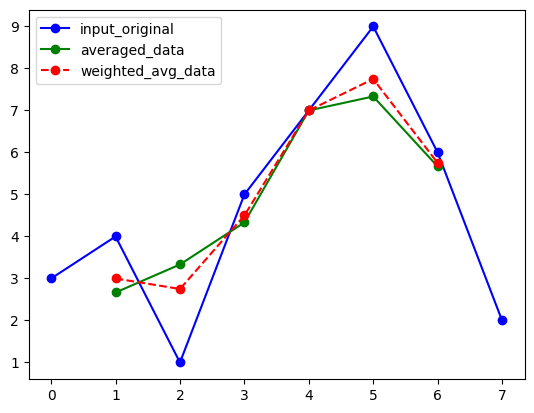

In [9]:

plt.plot(data, 'bo-', label='input_original')
plt.plot(ma_y, 'go-', label='averaged_data')
plt.plot(w_mavg, 'ro--', label='weighted_avg_data')

plt.legend()

커널 : 데이터의 특징을 찾아낸다.

In [10]:
data = [0,0,0,10,10,10,10,10,10,10,0,0,0]  #이 데이터는 0에서 10으로 급격히 상승했다가 다시 0으로 급격히 하강하는 특징을 가집니다.

#이 커널은 중앙값(현재 데이터)에 더 큰 가중치(2)를 부여하며, 앞뒤 값에 각각 -1의 가중치를 적용합니다.
#이는 데이터의 **변화(Gradient)**를 감지하는 데 유용한 형태입니다

h = [-1, 2, -1] #커널

In [11]:
w_mavg = [0]
for i in range(1, len(data)-1) :
    w_mavg.append(h[0]*data[i-1] + h[1]*data[i] + h[2]*data[i+1]) #합성곱 연산

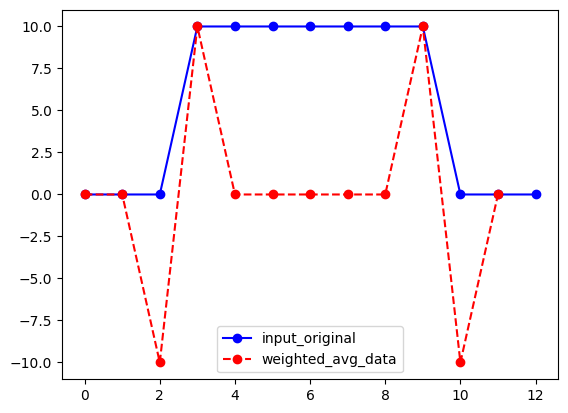

In [12]:
plt.plot(data, 'bo-', label='input_original')
plt.plot(w_mavg, 'ro--', label='weighted_avg_data')

plt.legend()

In [13]:
import numpy as np

def Conv2D(img, kernel=None, padding="valid"):
    if kernel is not None :
        h, w = img.shape[0:2] #이미지의 높이와 너비를 가져옵니다.
        kh, kw = kernel.shape #커널의 높이와 너비를 가져옵니다.
        sy, sx = int(kh/2), int(kw/2) #스트라이드 값을 설정합니다.커널의 중심에서 위아래/좌우로 얼마나 움직이는지 계산
        if padding=="same":
            new_shape = (h+sy, w+sx) #입력 이미지와 같은 크기의 출력을 생성하기 위해 가장자리에 0으로 채운 패딩을 추가.
            img_out = np.zeros(new_shape, dtype=np.uint8)
        elif padding=="valid":
            img_out = np.zeros(img.shape, dtype=np.uint8) #패딩을 추가하지 않고 출력 이미지를 생성

#합성곱 연산을 수행합니다.
        height, width = img_out.shape
        for y in range(sy, height-2*sy):
            for x in range(sx, width-2*sx):
                roi = img[y-sy:y+sy+1, x-sx:x+sx+1] #관심 영역(Region of Interest)을 가져옵니다. 커널 중심을 기준으로 입력 이미지에서 부분 영역(ROI)을 가져옴.
                filtered = roi * kernel #합성곱 연산을 수행합니다.
                conv_value = np.abs(np.sum(filtered)) #합성곱 연산을 수행하고 절댓값을 취합니다.
                img_out[y, x] = np.uint8(conv_value) #출력 이미지에 합성곱 연산의 결과를 저장합니다.

        return img_out[sy:-sy, sx:-sx] #패딩을 제거하고 출력 이미지를 반환
    else:
        print("Kernel array not found!")

# 이미지 처리하는 라이브러리

opencv  -> 코랩에 내장되어 있다.

In [14]:
import cv2

cv2.__version__

'4.10.0'

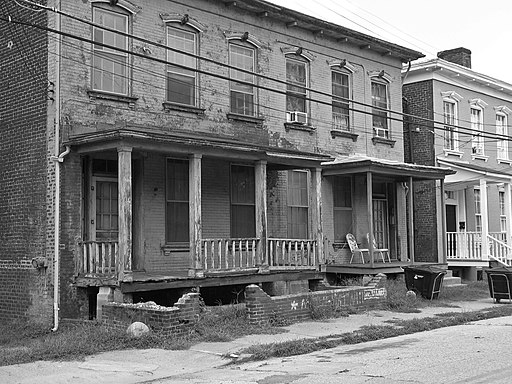

In [16]:
import cv2  # pip install opencv-python
from google.colab.patches import cv2_imshow

img = cv2.imread("house.jpg", cv2.IMREAD_GRAYSCALE)
cv2_imshow(img)

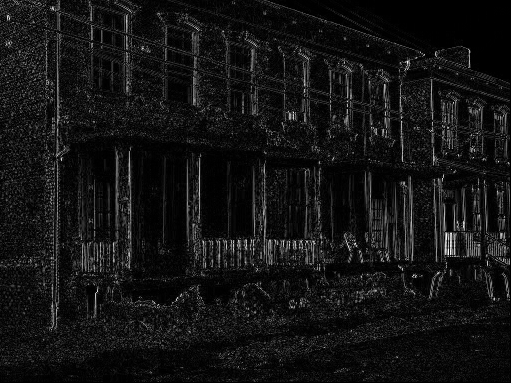

In [18]:
kernel = np.array([[0,0,0],[0,1,-1],[0,0,0]])

output = Conv2D(img, kernel=kernel, padding="same")
cv2_imshow(output)

In [ ]:
# local 환경에서 cv로 실행하는 코드
# cv2.imshow("House", img)
# cv2.imshow("Conv2D", output)

In [19]:
cv2.waitKey()
cv2.destroyAllWindows()

# 맥스풀링

In [20]:
import numpy as np

def maxpool2d(img):
    height, width = img.shape
    img_ = np.zeros((int(height/2), int(width/2)), dtype=np.uint8) #크기는 원본 이미지의 절반입니다. 데이터 타입은 np.uint8로 설정(픽셀 값은 0~255 범위)
    for y in range(int(height/2)):
        for x in range(int(width/2)):
            try:
                img_[y, x] = np.max(img[2*y:2*y+2, 2*x:2*x+2]) #각 2x2 블록은 (2*y:2*y+2, 2*x:2*x+2)로 슬라이싱됩니다. 여기서 np.max() 함수를 사용하여 최대값을 찾습니다.
            except:
                pass
    return img_

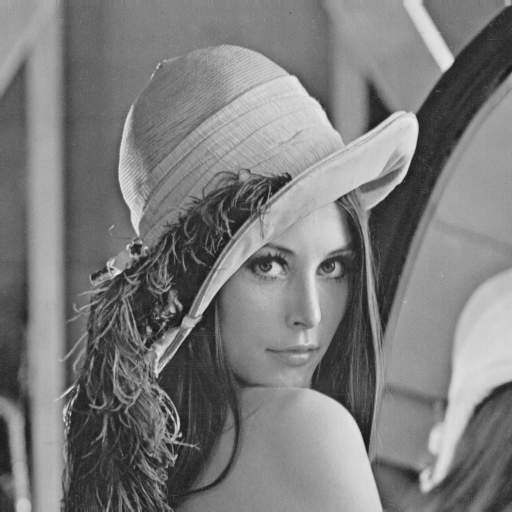

In [21]:
import cv2
from google.colab.patches import cv2_imshow

img = cv2.imread("lena.jpg", cv2.IMREAD_GRAYSCALE)
#cv2.imshow("Lena", img)
cv2_imshow(img)

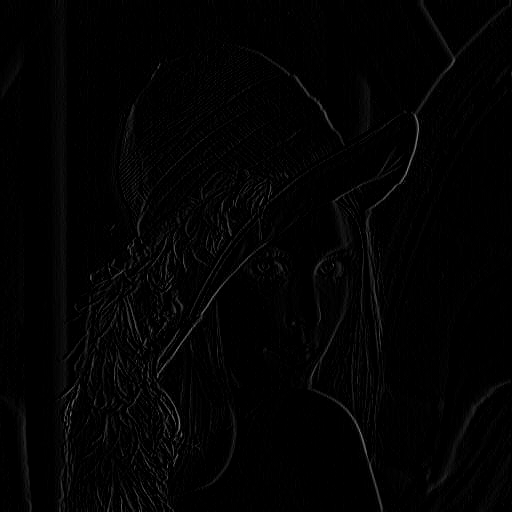

In [22]:
kernel = np.array([[0,0,0], [0,1,-1], [0,0,0]])
edge = cv2.filter2D(img, -1, kernel)

cv2_imshow(edge)


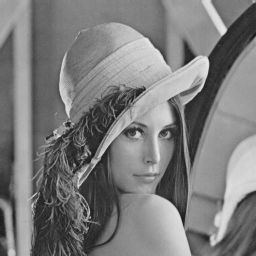

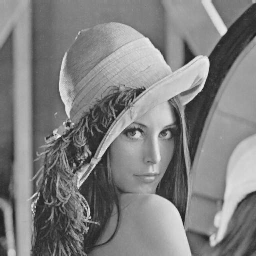

In [23]:
#사이즈 축소
cv2_imshow(cv2.resize(img, dsize=(0,0), fx=0.5, fy=0.5))
#맥스풀
cv2_imshow(maxpool2d(img))
# cv2_imshow(cv2.resize(edge, dsize=(0,0), fx=0.5, fy=0.5))
# cv2_imshow(maxpool2d(edge))

cv2.waitKey()
cv2.destroyAllWindows()

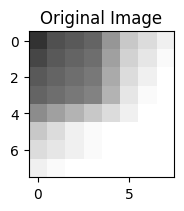

In [24]:
import numpy as np
import matplotlib.pyplot as plt

# 이미지 데이터를 NumPy 배열로 정의 (예: 간단한 8x8 그레이스케일 이미지)
img = np.array([
    [50, 80, 90, 100, 150, 200, 220, 240],
    [70, 90, 100, 110, 160, 210, 230, 250],
    [90, 100, 110, 120, 170, 220, 240, 255],
    [100, 110, 120, 130, 180, 230, 250, 255],
    [140, 160, 180, 200, 220, 240, 255, 255],
    [200, 220, 240, 250, 255, 255, 255, 255],
    [220, 230, 240, 250, 255, 255, 255, 255],
    [240, 250, 255, 255, 255, 255, 255, 255]
], dtype=np.uint8)

# 1. 원본 이미지 시각화
plt.subplot(231)
plt.title("Original Image")
plt.imshow(img, cmap='gray', vmin=0, vmax=255)

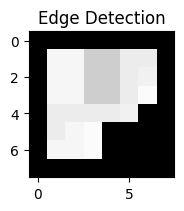

In [25]:
# 2. 간단한 합성곱 (에지 검출)
kernel = np.array([[0, 0, 0], [0, 1, -1], [0, 0, 0]])
edge = np.zeros_like(img)
for y in range(1, img.shape[0]-1):
    for x in range(1, img.shape[1]-1):
        edge[y, x] = np.sum(kernel * img[y-1:y+2, x-1:x+2])

plt.subplot(232)
plt.title("Edge Detection")
plt.imshow(edge, cmap='gray', vmin=0, vmax=255)

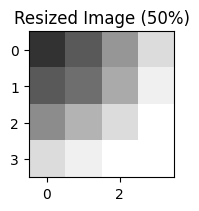

In [26]:
# 3. 이미지 리사이즈 (다운샘플링, 50%)
resized = img[::2, ::2]
plt.subplot(233)
plt.title("Resized Image (50%)")
plt.imshow(resized, cmap='gray', vmin=0, vmax=255)


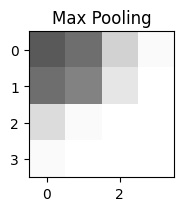

In [27]:
# 4. Max Pooling 구현
def maxpool2d(image):
    pooled = np.zeros((image.shape[0]//2, image.shape[1]//2), dtype=np.uint8)
    for y in range(pooled.shape[0]):
        for x in range(pooled.shape[1]):
            pooled[y, x] = np.max(image[2*y:2*y+2, 2*x:2*x+2])
    return pooled

pooled_img = maxpool2d(img)
plt.subplot(234)
plt.title("Max Pooling")
plt.imshow(pooled_img, cmap='gray', vmin=0, vmax=255)

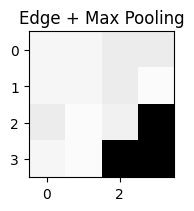

In [28]:
# 5. 에지 검출 결과에 Max Pooling 적용
pooled_edge = maxpool2d(edge)
plt.subplot(235)
plt.title("Edge + Max Pooling")
plt.imshow(pooled_edge, cmap='gray', vmin=0, vmax=255)

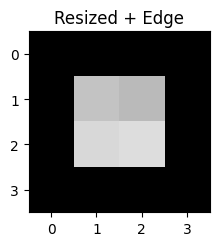

In [29]:
# 6. 리사이즈된 이미지에 에지 검출 적용
resized_edge = np.zeros_like(resized)
for y in range(1, resized.shape[0]-1):
    for x in range(1, resized.shape[1]-1):
        resized_edge[y, x] = np.sum(kernel * resized[y-1:y+2, x-1:x+2])

plt.subplot(236)
plt.title("Resized + Edge")
plt.imshow(resized_edge, cmap='gray', vmin=0, vmax=255)

plt.tight_layout()
plt.show()

In [30]:
#CNN 으로 구현
from tensorflow.keras import Sequential, layers

model = Sequential([
    layers.Input(shape=(28, 28, 1)), #(28, 28, 1)은 흑백 이미지로, 높이와 너비가 각각 28픽셀이며 채널은 1(그레이스케일)을 의미
    layers.Conv2D(32, (3, 3), activation='relu',),  # 32개의 특징 맵(feature maps)을 생성하는 합성곱 레이어
    layers.MaxPooling2D(pool_size=(2, 2))  #2x2 크기의 윈도우에서 최대값을 추출하여 이미지를 다운샘플링
])
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 26, 26, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 13, 13, 32)          │               0 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 320 (1.25 KB)

 Trainable params: 320 (1.25 KB)

 Non-trainable params: 0 (0.00 B)